In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# IMPORTING THE DATASET
train = pd.read_csv("C:\\Users\\PUNEET SINGH\\titanic train.csv")
test = pd.read_csv("C:\\Users\\PUNEET SINGH\\titanic test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# SHAPE OF THE TRAIN AND TEST SET
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
# INFO OF THE DATASET
print(train.info())
print('_'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [6]:
# CHECKING FOR THE NULL VALUES IN THE DATA SET
print(train.isnull().sum())
print('_'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# CHECKING THE VALUE COUNT OF THE CABIN FEATURE
train['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
F33                3
F2                 3
D                  3
E101               3
C68                2
F4                 2
E8                 2
B57 B59 B63 B66    2
B5                 2
D35                2
C83                2
B51 B53 B55        2
C124               2
C2                 2
C93                2
F G73              2
C126               2
D20                2
D33                2
C125               2
E24                2
E33                2
E44                2
B18                2
B49                2
B58 B60            2
                  ..
C85                1
E31                1
C101               1
A20                1
A31                1
C91                1
E63                1
D28                1
B79                1
C49                1
B94                1
D46                1
F38                1
B38                1
D6                 1
C148               1
D37          

In [8]:
#Fill in missing values expect cabin column 
train['Age'] = train.Age.fillna(train.Age.mean())
test['Age'] = test.Age.fillna(test.Age.mean())
train['Embarked'] = train.Embarked.fillna(train.Embarked.mode()[0])
test['Embarked'] = test.Embarked.fillna(test.Embarked.mode()[0])
test['Fare'] = test.Fare.fillna(test.Fare.mean())
print(train.isnull().sum())
print('_'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


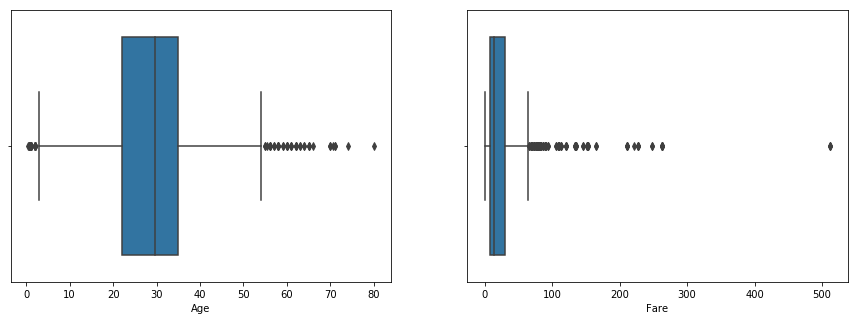

In [9]:
#Check outliers for continuous variables 
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.boxplot(x = 'Age', data = train)
plt.subplot(122)
sns.boxplot(x = 'Fare', data = train)

In [10]:
# both the continous variable contains outliers

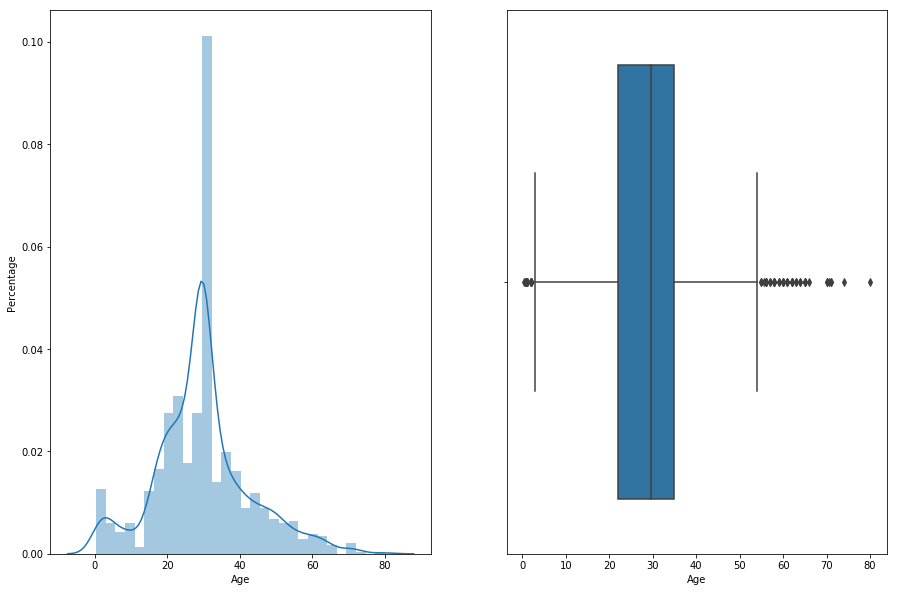

In [11]:
#Age Analysis
plt.figure(figsize = (15,10))
plt.subplot(121)
ax1 = sns.distplot(train.Age)
# for checking whether age is normally distributed or not 
ax1.set(xlabel = "Age", ylabel = "Percentage")
plt.subplot(122)
ax2 = sns.boxplot(train.Age)

In [12]:
# checking every feature for survival rate

In [13]:
# Survival Rate Analysis
#Total Survival Rate
train.Survived.mean()

0.3838383838383838

In [14]:
#Sex classes and survival rate for each class
print(train.groupby('Sex').size())
print('_'*40)
print(train.groupby('Sex').mean()['Survived'].sort_values(ascending = False))

Sex
female    314
male      577
dtype: int64
________________________________________
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [15]:
#Embarked classes and survival rate for each class
print(train.groupby('Embarked').size())
print('_'*40)
print(train.groupby('Embarked').mean()['Survived'].sort_values(ascending = False))

Embarked
C    168
Q     77
S    646
dtype: int64
________________________________________
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [16]:
#Parch classes and survival rate for each class
print(train.groupby('Parch').size())
print('_'*40)
print(train.groupby('Parch').mean()['Survived'].sort_values(ascending = False))

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
________________________________________
Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64


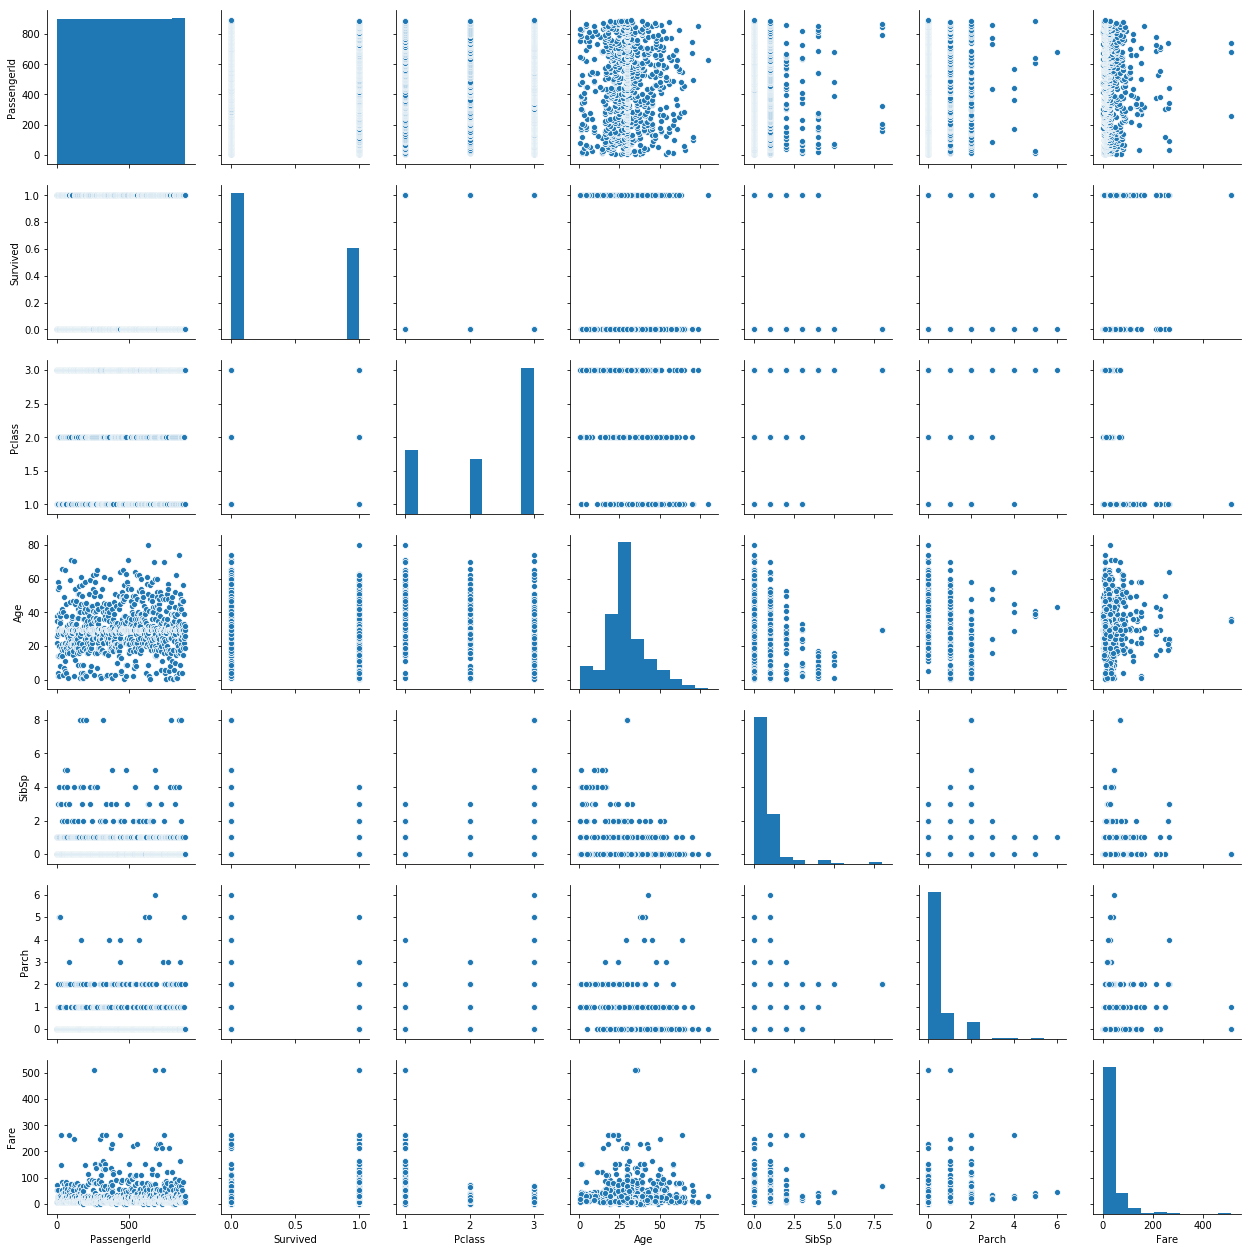

In [17]:
#correlation
sns.pairplot(train)

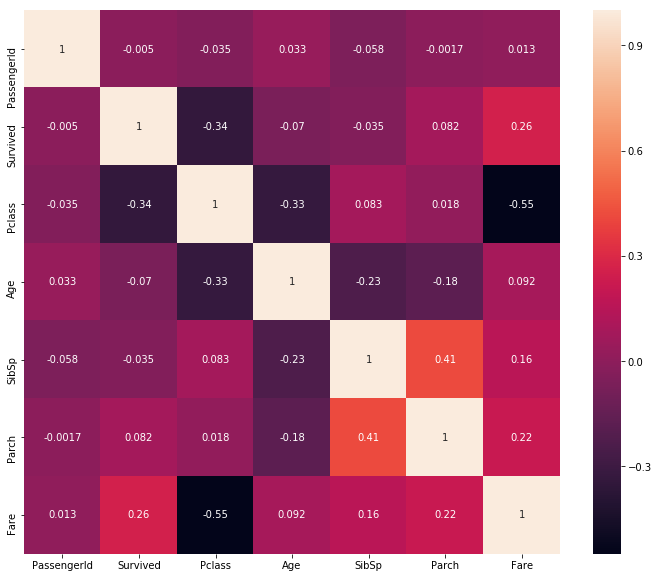

In [18]:
# CORRELATION MATRIX
corr= train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [19]:
# dropping certain features of the train data
train.drop(['PassengerId'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)

In [20]:
# dropping certain features of the test data
test.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
# checking the value counts of sex and embarked features 
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
x = ['Sex','Embarked']

In [25]:
# changing the categorical sex and embarked fetures into binary format

In [26]:
# importing the library
# import label encoder
from sklearn.preprocessing import LabelEncoder

In [27]:
label = LabelEncoder()
for i in train[x]:
    train[i]=label.fit_transform(train[i])

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [30]:
# changing the catergorical data into binary form
y = ['Sex','Embarked']
for i in test[y]:
    test[i]=label.fit_transform(test[i])

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [32]:
# removing the outliers through train and test dataset
# importing the library
from scipy.stats import zscore

In [33]:
z = np.abs(zscore(train))

In [34]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [35]:
train = train[(z < 3).all(axis=1)]

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [37]:
# removing the outliers from the test set
z = np.abs(zscore(test))

In [38]:
threshold = 3
print(np.where(z>3))

(array([ 24,  53,  55,  59,  64,  69,  69,  74,  75,  81,  96, 114, 132,
       139, 140, 142, 154, 156, 174, 184, 188, 202, 214, 218, 324, 342,
       343, 360, 365, 375, 379, 407], dtype=int64), array([5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 2, 5, 4, 4, 3, 5, 3, 5, 4, 5, 3, 5,
       3, 5, 5, 4, 5, 3, 4, 5, 3, 5], dtype=int64))


In [39]:
test = test[(z < 3).all(axis=1)]

In [40]:
# segregrating the independent and dependent variables
X = train.drop(['Survived'],axis=1)
Y = train['Survived']

In [41]:
# applying feature scaling on the X of the train data
# importing the library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
type(X)

numpy.ndarray

In [44]:
X = pd.DataFrame(X)

In [45]:
X.head()

,0,1,2,3,4,5,6
0,0.833995,0.722036,-0.641702,1.051956,-0.451141,-0.623707,0.583162
1,-1.586804,-1.384973,0.675821,1.051956,-0.451141,1.525109,-1.953669
2,0.833995,-1.384973,-0.312321,-0.563407,-0.451141,-0.601055,0.583162
3,-1.586804,-1.384973,0.428785,1.051956,-0.451141,0.914918,0.583162
4,0.833995,0.722036,0.428785,-0.563407,-0.451141,-0.596861,0.583162


In [46]:
# splitting the dataset
# importing the library
from sklearn.model_selection import train_test_split

In [47]:
# importing the decision tree classifier model 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2,random_state=7)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2)

In [50]:
#Decision Tree
C50_model = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)


In [51]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

78.65853658536585

In [52]:
#False Negative rate 
(FN*100)/(FN+TP)


28.205128205128204

In [53]:
# DECISION TREE MODEL IS PREDICTING 76 % CORRECT PREDICTIONS

In [54]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, Y_train)

In [55]:
RF_Predictions = RF_model.predict(X_test)

In [56]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

78.65853658536585

In [57]:
# RANDOM FOREST MODEL HAS PREDICTED 79% CORRECT PREDICTION WHICH IS BETTER THAN OUR DECISION TREE MODEL

In [58]:
#Built Logistic Regression
from sklearn.linear_model import LogisticRegression

In [59]:
lg = LogisticRegression()

In [62]:
lg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
pred = lg.predict(X_test)

In [64]:
acc_score = accuracy_score(pred,Y_test)*100
acc_score

81.70731707317073

In [65]:
# LOGISTIC MODEL IS PREDICTING THE MAXIMUM CORRECTNESS WITH 81 % ACCURACY

In [66]:
# KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier( n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
knn_pred = knn.predict(X_test)
knn.score(X_train,Y_train)

0.8597560975609756

In [70]:
acc_score = accuracy_score(knn_pred,Y_test)
acc_score

0.7682926829268293

In [71]:
# LOGISTIC MODEL HAS PREDICTED THE MODEL WITH 82 % ACCURACY WHICH IS BEST AMONG OTHER MODELS 